### Perform data preparation

**Import necessary packages**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

**Load the dataset**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel('booking_dataset.xlsx')

# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Reset the index starting from 1
df.index = df.index+ 1

# View the updated DataFrame
df

,accommodation_name,original_price,discounted_price,star_rating,room_type,distance_to_center,rate,rate_count
1,The Morris Hotel Da Lat,800000.0,400000,3.0,Standard Double Room,1.3,8.8,177.0
2,Dalat Wind Hotel,554400.0,415800,2.0,Economy Quadruple Room - Basement,0.7,8.5,397.0
3,Bazan Hotel Dalat,750000.0,412500,3.0,Standard Double Room,1.8,9.1,1229.0
4,Nhà nghỉ THANH TÙNG,270000.0,243000,NaN,Double Room,1.0,NaN,NaN
5,HANZ Bao Hoang Hotel 48 Ha Huy Tap,487200.0,263088,3.0,Standard Queen Room,0.9,6.8,36.0
...,...,...,...,...,...,...,...,...
985,Thiên Thanh,NaN,702000,NaN,Double Room,1.9,8.7,35.0
986,New Sleep in Dalat Hostel,392400.0,353160,NaN,Bunk Bed in Mixed Dormitory Room,0.6,9.6,29.0
987,The Mountain Homestay Đà Lạt,NaN,920000,NaN,King Room with Balcony,1.6,NaN,NaN
988,Tashi House Dalat (Thong Nho oi),NaN,280000,NaN,Single Bed in 4-Bed Dormitory Room,35.0,8.3,4.0


**Explore the dataset**

In [3]:
# Check the dimensions of the dataset
df.shape

(989, 8)

In [4]:
# Preview the first few rows of the dataset
df.head()

,accommodation_name,original_price,discounted_price,star_rating,room_type,distance_to_center,rate,rate_count
1,The Morris Hotel Da Lat,800000.0,400000,3.0,Standard Double Room,1.3,8.8,177.0
2,Dalat Wind Hotel,554400.0,415800,2.0,Economy Quadruple Room - Basement,0.7,8.5,397.0
3,Bazan Hotel Dalat,750000.0,412500,3.0,Standard Double Room,1.8,9.1,1229.0
4,Nhà nghỉ THANH TÙNG,270000.0,243000,NaN,Double Room,1.0,NaN,NaN
5,HANZ Bao Hoang Hotel 48 Ha Huy Tap,487200.0,263088,3.0,Standard Queen Room,0.9,6.8,36.0


In [5]:
# Get summary statistics of the numerical columns
df.describe()

,original_price,discounted_price,star_rating,distance_to_center,rate,rate_count
count,3.610000e+02,9.890000e+02,309.000000,989.000000,846.000000,849.000000
mean,1.349577e+06,9.480723e+05,2.297735,6.728918,8.521040,87.060071
std,2.290035e+06,1.663733e+06,0.902033,12.096951,1.225433,140.194516
min,2.200000e+05,1.400000e+05,1.000000,0.500000,1.000000,1.000000
25%,5.544000e+05,3.500000e+05,2.000000,1.000000,8.200000,7.000000
50%,8.360000e+05,5.000000e+05,2.000000,1.600000,8.700000,32.000000
75%,1.479000e+06,9.920000e+05,3.000000,3.000000,9.200000,106.000000
max,3.740000e+07,3.366000e+07,5.000000,50.000000,10.000000,1229.000000


In [6]:
# Check the data types of each column
df.dtypes

accommodation_name     object
original_price        float64
discounted_price        int64
star_rating           float64
room_type              object
distance_to_center    float64
rate                  float64
rate_count            float64
dtype: object

**Perform data cleaning and preprocessing**

In [7]:
# Check for missing values
df.isnull().sum()

# Replace null values in the 'original_price' column with corresponding 'discounted_price' values
df['original_price'].fillna(df['discounted_price'], inplace=True)

# Calculate the price difference for each observation
df['price_difference'] = df['original_price'] - df['discounted_price']

# Remove duplicates
df = df.drop_duplicates()

# Reset the index
df.reset_index(drop=True, inplace=True)
df.index += 1

# View the updated DataFrame
df

,accommodation_name,original_price,discounted_price,star_rating,room_type,distance_to_center,rate,rate_count,price_difference
1,The Morris Hotel Da Lat,800000.0,400000,3.0,Standard Double Room,1.3,8.8,177.0,400000.0
2,Dalat Wind Hotel,554400.0,415800,2.0,Economy Quadruple Room - Basement,0.7,8.5,397.0,138600.0
3,Bazan Hotel Dalat,750000.0,412500,3.0,Standard Double Room,1.8,9.1,1229.0,337500.0
4,Nhà nghỉ THANH TÙNG,270000.0,243000,NaN,Double Room,1.0,NaN,NaN,27000.0
5,HANZ Bao Hoang Hotel 48 Ha Huy Tap,487200.0,263088,3.0,Standard Queen Room,0.9,6.8,36.0,224112.0
...,...,...,...,...,...,...,...,...,...
980,Thiên Thanh,702000.0,702000,NaN,Double Room,1.9,8.7,35.0,0.0
981,New Sleep in Dalat Hostel,392400.0,353160,NaN,Bunk Bed in Mixed Dormitory Room,0.6,9.6,29.0,39240.0
982,The Mountain Homestay Đà Lạt,920000.0,920000,NaN,King Room with Balcony,1.6,NaN,NaN,0.0
983,Tashi House Dalat (Thong Nho oi),280000.0,280000,NaN,Single Bed in 4-Bed Dormitory Room,35.0,8.3,4.0,0.0


In [8]:
# Remove outliers

# Calculate the interquartile range (IQR) for price_difference
Q1 = df['price_difference'].quantile(0.25)
Q3 = df['price_difference'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df = df[(df['price_difference'] >= lower_bound) & (df['price_difference'] <= upper_bound)]

# Reset the index
df.reset_index(drop=True, inplace=True)
df.index += 1

# View the updated DataFrame
df

,accommodation_name,original_price,discounted_price,star_rating,room_type,distance_to_center,rate,rate_count,price_difference
1,The Morris Hotel Da Lat,800000.0,400000,3.0,Standard Double Room,1.3,8.8,177.0,400000.0
2,Dalat Wind Hotel,554400.0,415800,2.0,Economy Quadruple Room - Basement,0.7,8.5,397.0,138600.0
3,Bazan Hotel Dalat,750000.0,412500,3.0,Standard Double Room,1.8,9.1,1229.0,337500.0
4,Nhà nghỉ THANH TÙNG,270000.0,243000,NaN,Double Room,1.0,NaN,NaN,27000.0
5,HANZ Bao Hoang Hotel 48 Ha Huy Tap,487200.0,263088,3.0,Standard Queen Room,0.9,6.8,36.0,224112.0
...,...,...,...,...,...,...,...,...,...
888,Thiên Thanh,702000.0,702000,NaN,Double Room,1.9,8.7,35.0,0.0
889,New Sleep in Dalat Hostel,392400.0,353160,NaN,Bunk Bed in Mixed Dormitory Room,0.6,9.6,29.0,39240.0
890,The Mountain Homestay Đà Lạt,920000.0,920000,NaN,King Room with Balcony,1.6,NaN,NaN,0.0
891,Tashi House Dalat (Thong Nho oi),280000.0,280000,NaN,Single Bed in 4-Bed Dormitory Room,35.0,8.3,4.0,0.0


### Perform data analytics

**1. What is the average price and middle price of accommodations? Are there any noticeable differences between them?**

In [9]:
# Calculate the mean and median of original_price
mean_original_price = df['original_price'].mean()
median_original_price = df['original_price'].median()

# Calculate the mean and median of discounted_price
mean_discounted_price = df['discounted_price'].mean()
median_discounted_price = df['discounted_price'].median()

# Print the results
print("Mean of original_price:", mean_original_price)
print("Median of original_price:", median_original_price)
print("Mean of discounted_price:", mean_discounted_price)
print("Median of discounted_price:", median_discounted_price)

Mean of original_price: 925103.615470852
Median of original_price: 562972.5
Mean of discounted_price: 860009.3094170403
Median of discounted_price: 465000.0


- The mean original price is higher than the median, indicating a skewed distribution with some accommodations having extremely high prices.
- The median original price is lower than the mean, suggesting a balance between higher and lower-priced accommodations.
- The mean discounted price is slightly lower than the mean original price, indicating some level of discounts on average.
- The median discounted price is significantly lower than the median original price, suggesting substantial discounts available.

**2. What proportion of hotels offer discounts compared to those without discounts?**

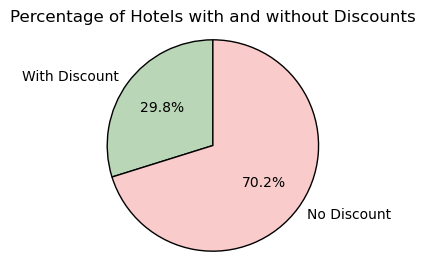

In [10]:
# Count the number of hotels with and without discounts
discount_counts = df[df['price_difference'] > 0].shape[0]
no_discount_counts = df[df['price_difference'] == 0].shape[0]

# Set the figure size
fig, ax = plt.subplots(figsize=(3, 3))

# Create the data for the pie chart
labels = ['With Discount', 'No Discount']
sizes = [discount_counts, no_discount_counts]

# Set the colors for the pie chart slices
colors = ['#B9D6B6', '#F9CBCB']

# Create the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Add a title to the pie chart
ax.set_title('Percentage of Hotels with and without Discounts')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the pie chart
plt.show()

- Only 29.8% of hotels offer discounts, indicating a majority without discounted offers.

**3. How does the average price difference vary among different star ratings? Which star rating category has the highest number of discounts?**

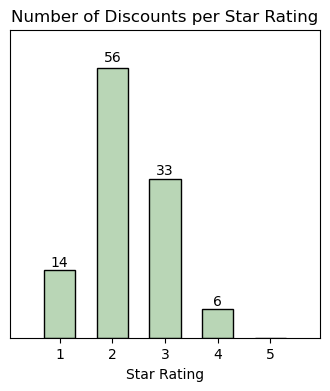

In [11]:
# Exclude rows with null star_rating values
df_filtered = df.dropna(subset=['star_rating'])

# Count the number of discounts per star rating
discount_counts = df_filtered[df_filtered['price_difference'] > 0].groupby('star_rating').size()

# Create a full range of x-axis values
x_values = range(1, 6)

# Set the figure size
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the bar chart
ax.bar(x_values, [discount_counts.get(star_rating, 0) for star_rating in x_values], width=0.6, color='#B9D6B6', edgecolor='black')

# Set labels and title
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Discounts')
ax.set_title('Number of Discounts per Star Rating')

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add value annotations next to each bar
for i, v in enumerate(discount_counts):
    if v == 0:
        ax.text(i+1, v*1.01, '', ha='center', va='bottom')
    else:
        ax.text(i+1, v*1.01, f'{v}', ha='center', va='bottom')
        
# Add padding to the top and bottom sides of the plot
plt.margins(0.14)

plt.show()

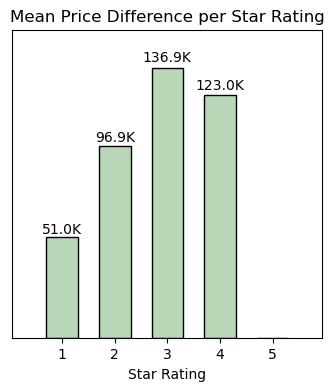

In [12]:
# Exclude rows with null star_rating values
df_filtered = df.dropna(subset=['star_rating'])

# Calculate the mean price_difference per star_rating
mean_price_difference = df_filtered.groupby('star_rating')['price_difference'].mean()

# Set the figure size
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the mean price_difference per star_rating as a vertical bar chart
ax.bar(mean_price_difference.index, mean_price_difference, width=0.6, color='#B9D6B6', edgecolor='black')

# Set labels and title
ax.set_xlabel('Star Rating')
ax.set_ylabel('Mean Price Difference')
ax.set_title('Mean Price Difference per Star Rating')

# Remove y-axis ticks and labels
ax.yaxis.set_ticks([])

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add value annotations next to each bar
for i, v in enumerate(mean_price_difference):
    if v == 0:
        ax.text(i+1, v*1.01, '', ha='center', va='bottom')
    else:
        ax.text(i+1, v*1.01, f'{round(v/1000, 1)}K', ha='center', va='bottom')

# Add padding to the top and bottom sides of the plot
plt.margins(0.14)

plt.show()

- 2-star hotels have the highest number of discounts (56), followed by 3-star hotels (33), suggesting budget-friendly accommodations are more likely to provide discounts.
- 3-star hotels offer the best average discounts (136.9K), while 4-star hotels offer good discounts (123K), though less common. 2-star hotels average discounts of 96.9K, providing reasonably discounted rates.

**4. Is there a relationship between the distance to the city center and the price? Do accommodations closer to the center tend to be more expensive or have higher discounts?**

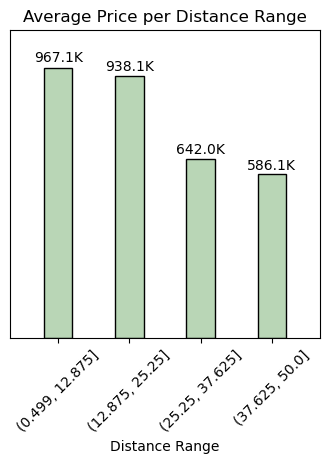

In [13]:
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

# Filter out the outliers
df_filtered = df[(df['distance_to_center'] >= lower_bound) & (df['distance_to_center'] <= upper_bound)]

# Define the distance ranges
distance_bins = np.linspace(df_filtered['distance_to_center'].min(), df_filtered['distance_to_center'].max(), num=5)

# Create a new column to store the distance range for each row
df_filtered['distance_range'] = pd.cut(df_filtered['distance_to_center'], bins=distance_bins, include_lowest=True)

# Calculate the average price per distance range
avg_price_per_range = df_filtered.groupby('distance_range')['original_price'].mean()

# Plot the average price per distance range
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.bar(avg_price_per_range.index.astype(str), avg_price_per_range, width=0.4, color='#B9D6B6', edgecolor='black')
ax.set_xlabel('Distance Range')
ax.set_title('Average Price per Distance Range')
ax.set_xticklabels(avg_price_per_range.index.astype(str), rotation=45)

# Format the y-axis labels as "K"
ax.yaxis.set_major_formatter(FuncFormatter(f'{round(v/1000, 1)}K'))

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add value annotations next to each bar
for i, v in enumerate(avg_price_per_range):
    if v == 0:
        ax.text(i, v*1.01, '', ha='center', va='bottom')
    else:
        ax.text(i, v*1.01, f'{round(v/1000, 1)}K', ha='center', va='bottom')

# Add padding to the top and bottom sides of the plot
plt.margins(0.14)

plt.show()

- Proximity to the city center tends to be associated with higher accommodation prices. As the distance from the city center increases, the prices tend to decrease.
- The largest differentiation observed between the accommodations is within the closer range (0.5 to 25.25 km) and those in the farther range (25.25 to 50 km). Interestingly, a bit far from the city center seems the best option for many guest, denoting a higher average price for staying 12-25 km away from such crowded area.

**5. What are the most common room types available? Are there any room types that are more expensive or more discounted on average?**

In [14]:
from collections import Counter

# Identify the most common words in the room_type column
room_type = ' '.join(list(df['room_type'].values))

common = Counter(room_type.split()).most_common(10)
print(common)

room_category = []
for tup in common:
    room_category.append(tup[0].lower())

[('Room', 667), ('Double', 450), ('with', 178), ('Standard', 143), ('Deluxe', 128), ('Apartment', 125), ('King', 66), ('Superior', 60), ('View', 54), ('Balcony', 50)]


- There is a variety of room types and features provided by hotels in the dataset.
- Double rooms (450) are the most common, along with other options like standard (143), deluxe (128), and apartment-style (125).
- Additionally, the availability of superior rooms (60), king-sized beds (66), views (54), and balconies (50) showcases the range of choices available to cater to different preferences and enhance the guest experience.

In [15]:
# Create a new column 'room_label' with default value as None
df['room_label'] = 'other'

# Define the room types
room_types = {
    'Double': 'double',
    'Standard': 'standard',
    'Deluxe': 'deluxe',
    'Superior': 'superior'
}

# Assign the corresponding room label based on the room type
for room_type, room_label in room_types.items():
    df.loc[df['room_type'].str.contains(room_type, case=False), 'room_label'] = room_label
    
# View the updated DataFrame
df

,accommodation_name,original_price,discounted_price,star_rating,room_type,distance_to_center,rate,rate_count,price_difference,room_label
1,The Morris Hotel Da Lat,800000.0,400000,3.0,Standard Double Room,1.3,8.8,177.0,400000.0,standard
2,Dalat Wind Hotel,554400.0,415800,2.0,Economy Quadruple Room - Basement,0.7,8.5,397.0,138600.0,other
3,Bazan Hotel Dalat,750000.0,412500,3.0,Standard Double Room,1.8,9.1,1229.0,337500.0,standard
4,Nhà nghỉ THANH TÙNG,270000.0,243000,NaN,Double Room,1.0,NaN,NaN,27000.0,double
5,HANZ Bao Hoang Hotel 48 Ha Huy Tap,487200.0,263088,3.0,Standard Queen Room,0.9,6.8,36.0,224112.0,standard
...,...,...,...,...,...,...,...,...,...,...
888,Thiên Thanh,702000.0,702000,NaN,Double Room,1.9,8.7,35.0,0.0,double
889,New Sleep in Dalat Hostel,392400.0,353160,NaN,Bunk Bed in Mixed Dormitory Room,0.6,9.6,29.0,39240.0,other
890,The Mountain Homestay Đà Lạt,920000.0,920000,NaN,King Room with Balcony,1.6,NaN,NaN,0.0,other
891,Tashi House Dalat (Thong Nho oi),280000.0,280000,NaN,Single Bed in 4-Bed Dormitory Room,35.0,8.3,4.0,0.0,other


In [16]:
# Calculate the average price per room type
avg_original_price_per_room_type = df.groupby('room_label')['original_price'].mean()
avg_discounted_price_per_room_type = df.groupby('room_label')['discounted_price'].mean()

print(avg_original_price_per_room_type)
print(avg_discounted_price_per_room_type)

room_label
deluxe      8.312725e+05
double      5.280563e+05
other       1.398973e+06
standard    5.840816e+05
superior    7.733066e+05
Name: original_price, dtype: float64
room_label
deluxe      7.697460e+05
double      4.767677e+05
other       1.337763e+06
standard    5.115570e+05
superior    6.447831e+05
Name: discounted_price, dtype: float64


- Common room types, i.e. deluxe, double, standard, and superior, generally have lower prices compared to the "other" category.
- Among the common ones, deluxe tends to be the most expensive, while double is usually the most affordable.

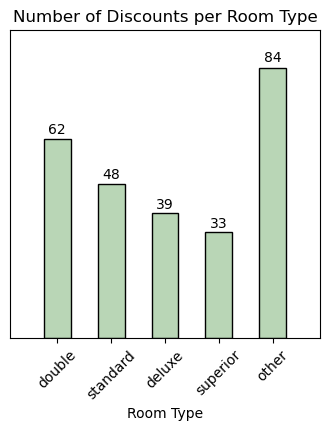

In [17]:
# Filter the data to include only rows with a positive price difference (indicating a discount)
discounted_df = df[df['price_difference'] > 0]

# Count the number of discount offers per room label
discount_counts = discounted_df['room_label'].value_counts()

# Define the desired order of room types
room_type_order = ['double', 'standard', 'deluxe', 'superior', 'other']

# Reorder the discount counts based on the desired room type order
discount_counts = discount_counts.loc[room_type_order]

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(4, 4))

# Create a bar plot of the number of discount offers per room label
ax.bar(discount_counts.index, discount_counts, width=0.5, color='#B9D6B6', edgecolor='black')
ax.set_xlabel('Room Type')
ax.set_ylabel('Number of Discounts')
ax.set_title('Number of Discounts per Room Type')

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add value annotations next to each bar
for i, v in enumerate(discount_counts):
    ax.text(i, v*1.01, str(v), ha='center', va='bottom')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(discount_counts.index, rotation=45)

# Set the x-axis tick locations
ax.set_xticks(range(len(discount_counts.index)))

# Add padding to the top and bottom sides of the plot
plt.margins(0.14)

# Display the plot
plt.show()

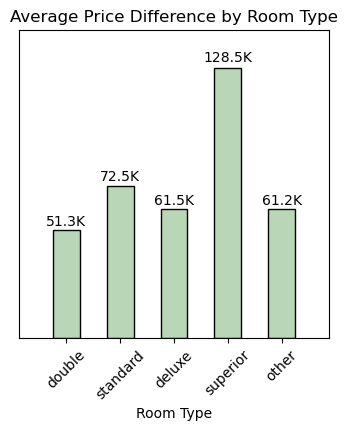

In [18]:
# Define the desired order of room types
room_type_order = ['double', 'standard', 'deluxe', 'superior', 'other']

# Calculate the average price difference per room type
avg_price_difference = df.groupby('room_label')['price_difference'].mean()

# Reorder the average price difference based on the desired room type order
avg_price_difference = avg_price_difference.loc[room_type_order]

# Find the room type with the highest average price difference
max_avg_price_diff_room_type = avg_price_difference.idxmax()

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(4, 4))

# Create a bar plot of the average price difference per room type
ax.bar(avg_price_difference.index, avg_price_difference, width=0.5, color='#B9D6B6', edgecolor='black')
ax.set_xlabel('Room Type')
ax.set_title('Average Price Difference by Room Type')

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add value annotations next to each bar
for i, v in enumerate(avg_price_difference):
    if v == 0:
        ax.text(i, v*1.01, '', ha='center', va='bottom')
    else:
        ax.text(i, v*1.01, f'{round(v/1000, 1)}K', ha='center', va='bottom')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(avg_price_difference.index, rotation=45)

# Set the x-axis tick locations
ax.set_xticks(range(len(avg_price_difference.index)))

# Add padding to the top and bottom sides of the plot
plt.margins(0.14)

# Display the plot
plt.show()

- Superior rooms have fewer discounts (33) but offer significant reductions (up to 128.5K discounted).
- Reversely, double rooms are commonly discounted (62), but with smaller price reductions (around 51.3K).
- Discounts are easily available for standard rooms (48) and deluxe rooms (39), with average reductions of approximately 72.5K and 61.5K respectively.

**6. What is the average rating for accommodations in the dataset? Are there any notable differences in the evaluation for accommodations among different star ratings?**

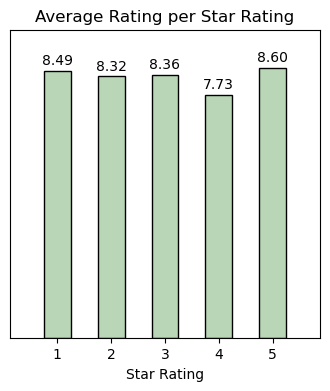

In [19]:
# Calculate the overall average rating for accommodations
avg_rate = df['rate'].mean()

# Calculate the average rating per star rating
avg_rate_per_star_rating = df.groupby('star_rating')['rate'].mean()

# Plot the average rating per star rating
plt.figure(figsize=(4, 4))
plt.bar(avg_rate_per_star_rating.index, avg_rate_per_star_rating, width=0.5, color='#B9D6B6', edgecolor='black')
plt.xlabel('Star Rating')
plt.title('Average Rating per Star Rating')
plt.xticks(avg_rate_per_star_rating.index)  # Set the x-axis tick locations

# Remove the y-axis
plt.gca().yaxis.set_visible(False)

# Add value annotations above each bar
for i, v in enumerate(avg_rate_per_star_rating):
    plt.text(i+1, v+0.1, f'{v:.2f}', ha='center', va='bottom')
    
# Add padding to the top and bottom sides of the plot
plt.margins(0.14)

# Display the plot
plt.show()

- Averagely, accommodations across various star ratings receive positive evaluations from guests, with ratings typically ranging around the upper 8 out of 10.
- However, there appears to be a slight difference in guest satisfaction with 4-star hotels, as their average rating is comparatively lower at 7.73.

**Summarize the analytics results**

- Accommodations in the dataset offer a range of prices, and some have high original prices but also provide significant discounts. Discounts are more commonly found in 2-star and 3-star hotels, which also receive positive guest evaluations. However, 4-star hotels tend to have slightly lower ratings.
- The proximity to the city center plays a role in accommodation prices, as prices generally decrease as the distance from the city center increases. However, it seems like a bit far from the center is the best options for many guest so that such hotels took this advantage to charge them higher prices.
- There is a diverse selection of room types and features available to cater to different preferences and enhance the guest experience. Common room types, such as deluxe, double, standard, and superior, have lower prices compared to the "other" category. Deluxe rooms are generally the most expensive among them.
- Superior rooms may have fewer discounts available, but they offer substantial price reductions when discounted. On the other hand, double rooms are commonly discounted, although the price reductions are relatively smaller. Standard and deluxe rooms are also readily available with discounts, offering significant savings.

### How can we decide on the best pricing approach?
To ensure that we have the best pricing strategy while staying competitive on Booking.com, let's utilize a Linear Regression model, a machine learning algorithm that helps to predict hotel prices based on a variety of features such as location, room types, star ratings, and so forth.

**Import necessary packages**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Perform dataset preprocessing**

In [21]:
# Remove missing values
df = df.dropna()

# Reset the index
df.reset_index(drop=True, inplace=True)
df.index += 1

# Create a one hot to add more variables in the dataset
pattern = "(?u)\\b[\\w-]+\\b"
cv = CountVectorizer(vocabulary = room_category, token_pattern = pattern)

one_hot = pd.DataFrame(cv.fit_transform(df['room_label']).todense(), 
                   df.index,
                   cv.get_feature_names_out())

one_hot = one_hot.apply(pd.to_numeric).drop(one_hot.columns[-1], axis = 1)

# View the one hot
one_hot

,room,double,with,standard,deluxe,apartment,king,superior,view
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
237,0,0,0,1,0,0,0,0,0
238,0,0,0,0,0,0,0,1,0
239,0,0,0,1,0,0,0,0,0
240,0,1,0,0,0,0,0,0,0


In [22]:
# Join the one hot to the DataFrame
predict_df = df.join(one_hot).drop(['room_type'], axis = 1)
predict_df.describe()

# Identify columns with constant values
constant_columns = [col for col in predict_df.columns if predict_df[col].nunique()==1]

# Drop columns with constant values
predict_df = predict_df.drop(constant_columns, axis=1)

<Axes: >

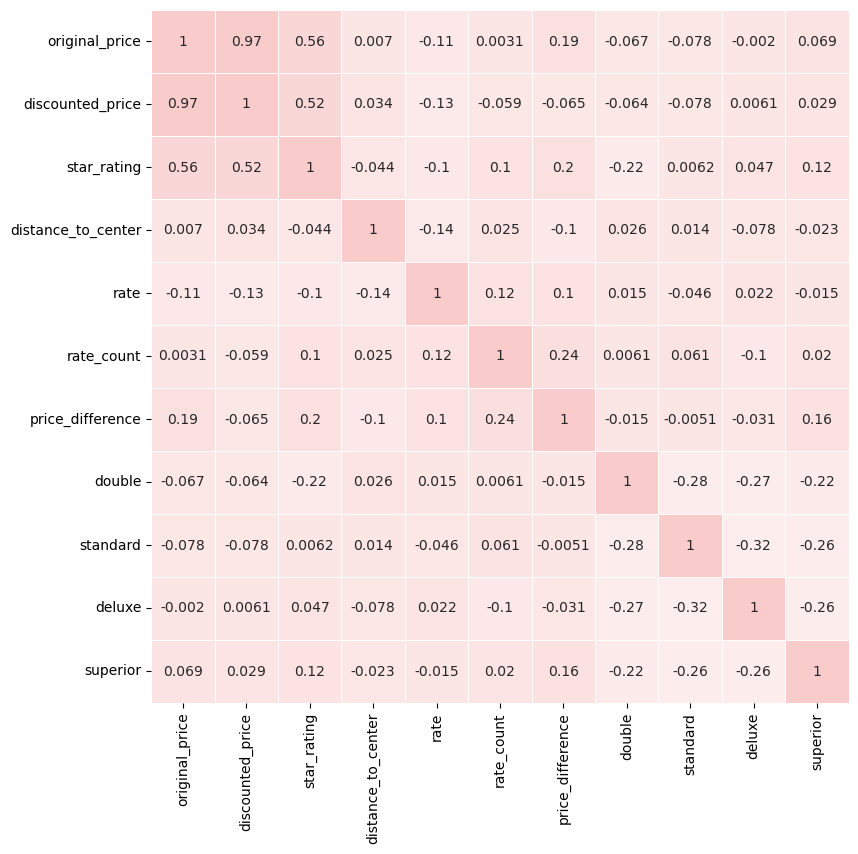

In [23]:
# Define a custom colormap with a single color
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", '#F9CBCB'])

# Plot a heat map to view the pairwise correlation between different variables in the dataset
plt.figure(figsize=(9, 9))
sns.heatmap(predict_df.corr(), vmin=-1, vmax=1, annot=True, cbar=False, cmap=cmap, linewidths=0.5)

**Utilize Linear Regression to predict hotel prices**

In [24]:
# Normalizing the dataset
mean = predict_df.mean()
std = predict_df.std()
predict_df = (predict_df-mean)/std

# Preparing datasets for training and testing
X = predict_df.drop(['accommodation_name', 'original_price', 'discounted_price', 'room_label'], axis = 1) # Due to the multicollinear problem (97% correlated)
y = predict_df['original_price']

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
rf_model = LinearRegression()
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

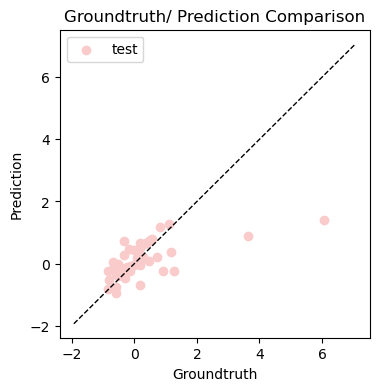

In [25]:
# Evaluate the model by comparing groundtruth values with the actual ones

# Predict the prices for the test set
y_test_pred = rf_model.predict(X_test.values)

# Determine the minimum and maximum values for the plot axes
xmin = min(y_test.min(), y_test_pred.min())-1
xmax = max(y_test.max(), y_test_pred.max())+1

# Plot the reference line with equation x2=x1 to indicate perfect predictions
plt.figure(figsize=(4, 4))
plt.plot([xmin, xmax], [xmin, xmax], lw=1, color='k', ls='--')

# Plot the scatter points for the ground truth and predicted values
plt.scatter(y_test, y_test_pred, marker='o', label='test', color='#F9CBCB')

# Set the labels for the x-axis and y-axis
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')

# Set the title of the plot
plt.title('Groundtruth/ Prediction Comparison')

# Add a legend to the plot
plt.legend()

The suggestion is that the model performs quite well, however, only for the accommodations with affordable prices.<br>
Now it's time to provide the model with some new inputs, i.e. our hotel's features, and let it do the prediction.

In [26]:
# Build some necessary functions
def room_type_detect():
    room_types = {
    "standard": 0,
    "double": 0,
    "deluxe": 0,
    "superior": 0
    }

    for key in room_types.keys():
        if key in room_type.lower():
            room_types[key] = 1
            
    return room_types

In [27]:
# Ask for a new hotel data
star_rating = int(input("Enter the star rating: "))
distance_to_center = float(input("Enter the distance to city center: "))
room_type = str(input("Enter the room type: "))
rate = float(input("Enter the guest rate: "))
rate_count = int(input("Enter the number of rates: "))
price_difference = float(input("Enter the possible discounted amount: "))

Enter the star rating:  2
Enter the distance to city center:  1.3
Enter the room type:  standard double room with queen bed
Enter the guest rate:  7.9
Enter the number of rates:  338
Enter the possible discounted amount:  0


In [29]:
# Ensure the data inputs provided by the correct order
room_check = list(room_type_detect().values())

#Predict the hotel price
new_data = [room_check[2], distance_to_center, room_check[1], price_difference, rate, rate_count, room_check[0], star_rating, room_check[3]]
new_data = np.array(new_data).reshape(1, -1)
new_prediction = rf_model.predict(new_data)
print("Predicted original price:", new_prediction[0]+std['original_price']+mean['original_price'])

Predicted original price: 1217724.5836619704
